<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/). 
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA). 
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
import copy

import torchmetrics
# Check for GPU
!nvidia-smi

Der Befehl "nvidia-smi" ist entweder falsch geschrieben oder
konnte nicht gefunden werden.


In [1]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device =  "cuda" if torch.cuda.is_available() else "cpu"

2.3.1


In [ ]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
    print("Downloading helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/tonyzamyatin/learning-pytorch/master/fcc-course/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

## 1. What are 3 areas in industry where computer vision is currently being used?

The computer vision application that comes first to my mind is **autonomous driving** which involves everything from image segmentation to 
object detection to object classification and much more. Recently, I have heard of computer vision applications in **agriculture** such as weed 
detection, yield 
estimation through fruit counting, and dara collection and decision-making in livestock farming. However, there are many more fields that employ 
computer 
vision, like quality inspection and assembly in **manufacturing**, disease diagnosis from medical images in **health care**, **security cameras**, 
automated content 
moderation on **social media**. 

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find. 

Overfitting is the phenomenon where a model learns patterns in the data that are specific to the training dataset (i.e., noise). As a result, the 
model does not generalize well to unseen examples from the *true* real world distribution, even if it performs well on the training dataset. This 
is the reason why we always split our dataset into a training and a test set. The test set contains unseen examples to test how well the model 
generalizes to new data. However, there have been countless examples of ML models achieving high scores on the test sets and still performing 
poorly in deployment. This can happen when the dataset (sample) that we worked with is not representative of the real data distribution. In some 
cases, the data distribution can change over time which necessitates constant retraining of the model.
The data issue is at the core of machine learning. 

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. 
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

1. **Proper testing** through the appropriate dataset splitting and *cross-validation*.
2. **Regularization techniques** prevent the model from becoming overly complex (model complexity correlates with overfitting). One regularization 
technique for neural networks is adding a *regularization term* to the loss function that penalizes model complexity (e.g., L1 or L2 regularization).
3. **Data augmentation** is the process of producing new samples from existing data by applying random transformations to it (e.g., in image 
classification one can generate new samples by randomly rotating, flipping, or zooming into images.) 
4. **Feature selection** can reduce the risk of overfitting by eliminating redundant or meaningless features (e.g., timestamps).
5. **Ensemble learning** aims to eliminate overfitting and boost performance by combining predictions from different models. Random forest is a 
powerful example of an ensemble method that builds multiple decision trees on subsets of the data.
6. **Dropout** layers in neural networks randomly deactivate a subset of neurons during training to avoid over-reliance on specific neurons 
(that is, latent features inside the network). The network is trained on the remaining active neurons, while random neurons are set to zero during 
each training iteration. In a sense, you train an ensemble of sparse networks and the dense network averages over the 
prediction of these sparse networks.
7. **Early stopping** aims to reduce the risk of overfitting by stopping training once the model has converged (i.e., the validation loss does not 
improve after a number of consecutive epochs).
8. **Reduce model complexity** by using a simpler model architecture (e.g., fewer layers or a simpler model altogether).
9. **Increasing training data** increases the probability that the sample is representative of the real data distribution (similar to law of large 
numbers) and 
hence 
moderates the 
risk of overfitting.
10. **Diverse datasets** which feature all kinds of examples are just as important as large datasets (e.g., both positive and negative examples and
 examples of all classes). 

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [55]:
from torchvision.transforms import ToTensor
import torchvision

train_data = torchvision.datasets.MNIST(
    root="data",
    train=True,
    transform=ToTensor(),
    download=True
)

test_data = torchvision.datasets.MNIST(
    root="data",
    train=False,
    transform=ToTensor(),
    download=True
)

## 6. Visualize at least 5 different samples of the MNIST training dataset.

In [6]:
img, label = train_data[0]
img.shape

torch.Size([1, 28, 28])

In [56]:
len(train_data), len(test_data)

(60000, 10000)

In [8]:
class_names = train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

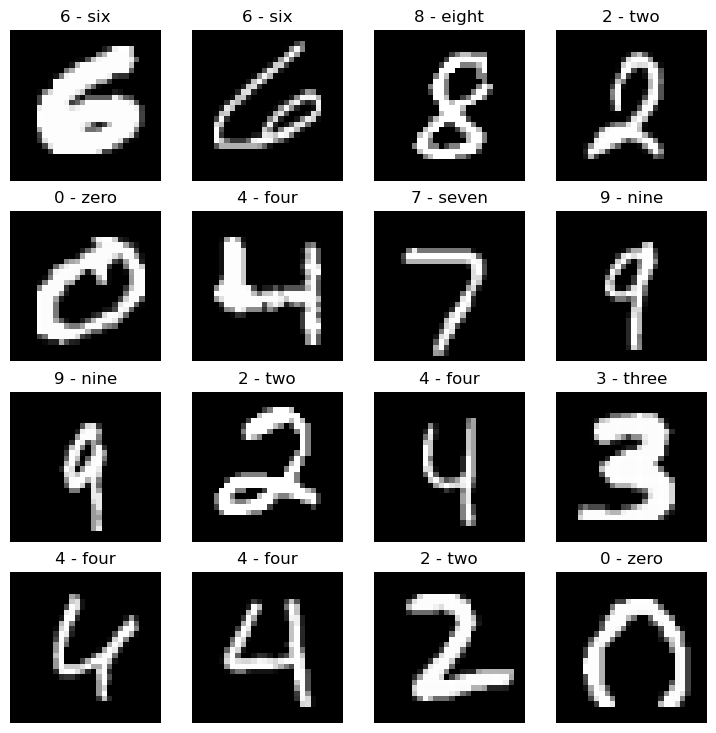

In [12]:
import matplotlib.pyplot as plt

torch.manual_seed(42)

fig = plt.figure(figsize=(9, 9))
row, col = 4, 4
for i in range(1, row * col + 1):
    rand_idx = torch.randint(low=0, high=len(train_data), size=[1]).item()
    img, label = train_data[rand_idx]
    fig.add_subplot(row, col, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [17]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_data_loader = DataLoader(train_data, batch_size=BATCH_SIZE)
test_data_loader = DataLoader(test_data, batch_size=BATCH_SIZE)

print("Number of training batches:", len(train_data_loader))
print("Number of testing batches:", len(test_data_loader))

Number of training batches: 1875
Number of testing batches: 313


## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [42]:
from torch import nn

class MNISTCNNModelV0(nn.Module):
    """
    CNN for 28x28 images inspired by TinyVGG.
    """
    def __init__(self, input_size: int, hidden_units: int, output_size: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_size, out_channels=hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)     # The default value for stride is kernel_size
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7, out_features=output_size),
        )
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.classifier(self.block_2(self.block_1(x)))

In [22]:
model = MNISTCNNModelV0(1, 10, len(class_names))
model

MNISTCNNModelV0(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

**Note**:
- For the first convolutional layer w have one gray scale input channel. Note that the model will learn in_channels * out_channels number of kernels 
for each convolutional layer.

- Since we use padding=1 for the convolutional layers and kernel_size=3 the output of each convolutional layer has the same shape as the input. 
Since we use a kernel_size and stride of 2 for the max-pooling layers we basically half the side length of the images (compress them to 1/4 of the 
input size). Since we use two max-pooling layers and expect 28x28 images as inputs, the output of block_2 is a 7x7 images (28 / 2 / 2 = 7). So the 
input for the linear layer after flattening the image will be 7 \* 7 \* hidden_units

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [29]:
import torchmetrics
import copy
from helper_functions import run_epoch, print_eval_metrics
from tqdm import tqdm

def train_test_loop(model: torch.nn.Module, loss_fn: torch.nn.Module, optimizer: torch.optim.Optimizer, train_data_loader: torch.utils.data
                    .DataLoader, test_data_loader: torch.utils.data.DataLoader,
                    epochs: int, device: device="cpu", metric_tracker: torchmetrics.MetricTracker=None):
    """
    Training testing loop.
    """
    train_metric_tracker = copy.deepcopy(metric_tracker)
    test_metric_tracker = copy.deepcopy(metric_tracker)
    for epoch in tqdm(range(epochs)):
        print(f"\nEPOCH {epoch + 1}")
        print("-------------")
        train_loss, train_metric_tracker = run_epoch(model, train_data_loader, loss_fn, metric_tracker, device, optimizer)
        computed_train_metrics = train_metric_tracker.compute()
        print("TRAINING EVAL")
        print_eval_metrics(train_loss, computed_train_metrics)
        
        test_loss, test_metric_tracker = run_epoch(model, test_data_loader, loss_fn, metric_tracker=test_metric_tracker, device=device)
        computed_test_metrics = test_metric_tracker.compute()
        print("TEST EVAL")
        print_eval_metrics(test_loss, computed_test_metrics)

In [25]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01, momentum=0.9)

In [26]:
from torchmetrics import MetricCollection, MetricTracker, Accuracy, Recall, Precision, F1Score, AUROC

metrics = MetricCollection({
    'accuracy': Accuracy(task="multiclass", num_classes=10, average='macro'),
    'recall': Recall(task="multiclass", num_classes=10, average='macro'),
    'precision': Precision(task="multiclass", num_classes=10, average='macro'),
    'f1_score': F1Score(task="multiclass", num_classes=10, average='macro'),
    'auroc': AUROC(task="multiclass", num_classes=10, average='macro')
})

metric_tracker = MetricTracker(metrics)

In [30]:
from timeit import default_timer as timer

train_time_start_cpu = timer()
train_test_loop(model, loss_fn, optimizer, train_data_loader, test_data_loader, epochs=5, device="cpu", metric_tracker=metric_tracker)
train_time_end_cpu = timer()

  0%|          | 0/5 [00:00<?, ?it/s]


EPOCH 1
-------------
TRAINING EVAL
Loss: 0.3053
Accuracy: 0.9006
Auroc: 0.9941
F1_score: 0.9018
Precision: 0.9043
Recall: 0.9006


 20%|██        | 1/5 [00:29<01:57, 29.38s/it]

TEST EVAL
Loss: 0.1134
Accuracy: 0.9623
Auroc: 0.9996
F1_score: 0.9619
Precision: 0.9638
Recall: 0.9623

EPOCH 2
-------------
TRAINING EVAL
Loss: 0.0744
Accuracy: 0.9769
Auroc: 0.9995
F1_score: 0.9769
Precision: 0.9769
Recall: 0.9769


 40%|████      | 2/5 [00:57<01:26, 28.87s/it]

TEST EVAL
Loss: 0.0644
Accuracy: 0.9788
Auroc: 0.9998
F1_score: 0.9786
Precision: 0.9788
Recall: 0.9788

EPOCH 3
-------------
TRAINING EVAL
Loss: 0.0565
Accuracy: 0.9826
Auroc: 0.9997
F1_score: 0.9826
Precision: 0.9826
Recall: 0.9826


 60%|██████    | 3/5 [01:26<00:57, 28.83s/it]

TEST EVAL
Loss: 0.0513
Accuracy: 0.9834
Auroc: 0.9998
F1_score: 0.9833
Precision: 0.9833
Recall: 0.9834

EPOCH 4
-------------
TRAINING EVAL
Loss: 0.0476
Accuracy: 0.9854
Auroc: 0.9998
F1_score: 0.9855
Precision: 0.9855
Recall: 0.9854


 80%|████████  | 4/5 [01:54<00:28, 28.62s/it]

TEST EVAL
Loss: 0.0470
Accuracy: 0.9844
Auroc: 0.9999
F1_score: 0.9843
Precision: 0.9843
Recall: 0.9844

EPOCH 5
-------------
TRAINING EVAL
Loss: 0.0423
Accuracy: 0.9872
Auroc: 0.9998
F1_score: 0.9872
Precision: 0.9872
Recall: 0.9872


100%|██████████| 5/5 [02:25<00:00, 29.14s/it]

TEST EVAL
Loss: 0.0430
Accuracy: 0.9865
Auroc: 0.9999
F1_score: 0.9864
Precision: 0.9864
Recall: 0.9865


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediction to the target label.

In [64]:
# Prepare test data
X_test = test_data.data.to(device=device).unsqueeze(dim=1).float()
y_test = test_data.targets.to(device=device)

X_test.shape, y_test.shape

(torch.Size([10000, 1, 28, 28]), torch.Size([10000]))

In [65]:
X_test.dtype, y_test.dtype

(torch.float32, torch.int64)

In [66]:
# Make predictions
logits = model(X_test)
preds = torch.softmax(logits, dim=1).argmax(dim=1)

preds.shape

torch.Size([10000])

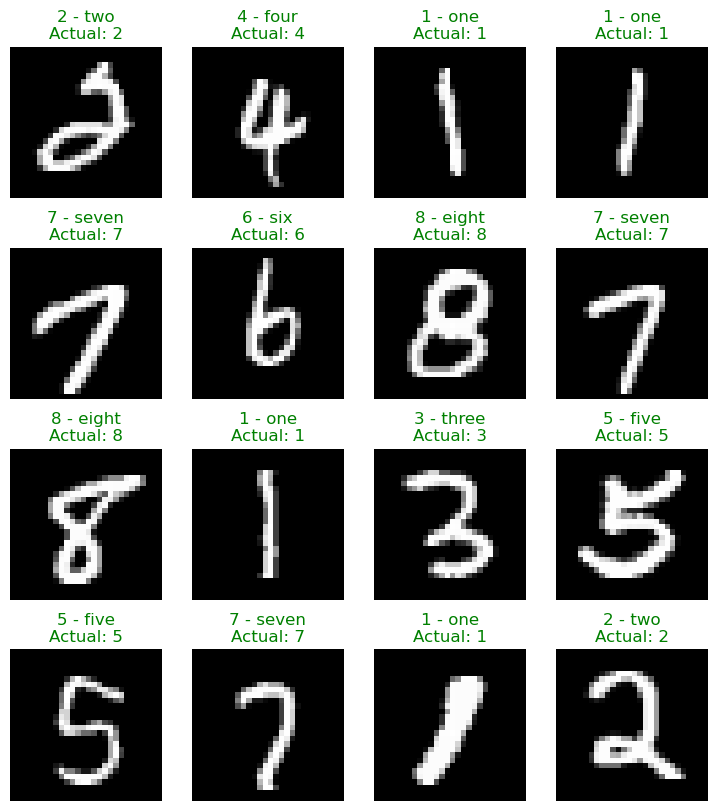

In [82]:
short_names = [name.split()[0] for name in class_names]

fig = plt.figure(figsize=(9, 10))
row, col = 4, 4
for i in range(1, row * col + 1):
    rand_idx = torch.randint(low=0, high=len(test_data), size=[1]).item()
    img, label = test_data[rand_idx]
    pred = preds[rand_idx]
    fig.add_subplot(row, col, i)
    plt.imshow(img.squeeze(), cmap="gray")
    color = "green" if pred == label else "red"
    plt.title(f"{class_names[pred]}\nActual: {short_names[label]}", fontdict={'color': color, 'fontsize': 12})
    plt.axis(False)

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

(<Figure size 1000x700 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

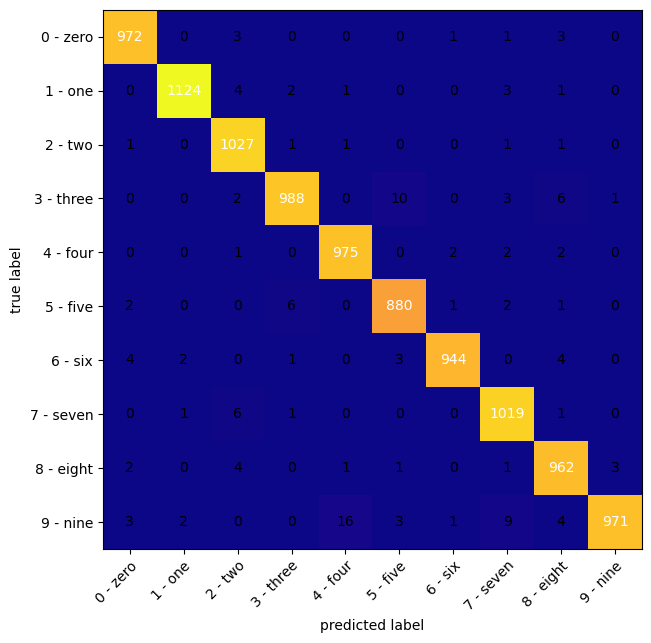

In [103]:
import matplotlib as mpl
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(task="multiclass", num_classes=len(class_names))
confmat_tensor = confmat(preds, y_test)

plot_confusion_matrix(confmat_tensor.numpy(), class_names=class_names, figsize=(10, 7), cmap=mpl.colormaps['plasma'])

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset. 
* Then plot some predictions where the model was wrong alongside what the label of the image should've been. 
* After visualing these predictions do you think it's more of a modelling error or a data error? 
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?